## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#reading data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
#number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#proportion of users that converted generally
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [59]:
#number of times 'treatment' and 'new_page' don't match
df.query("group == 'treatment' and landing_page != 'new_page'").shape[0] + df.query("group != 'treatment' and landing_page == 'new_page'").shape[0]

3893

f. Do any of the rows have missing values?

In [74]:
#cheking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


######    <span style="color: green;">no missing values in the rows</span>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query("group == 'treatment' and landing_page != 'new_page'").index, axis = 0)
df2 = df2.drop(df.query("group != 'treatment' and landing_page == 'new_page'").index, axis = 0)
df2.shape[0]

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#number of unique users in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#cheking for duplicated ids
df2[df2['user_id'].duplicated() == True].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
#display the duplicated id row
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Remove one of the rows with a duplicate user_id..
df2 = df2.drop(df2[df2['user_id'].duplicated() == True].index, axis = 0)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated() == True].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#proportion of users who converted generally
p_cvd = df2.converted.mean()
p_cvd

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#proportion of users who converted in control group
control_cvd = df2[df2['group'] == 'control'].converted.mean()
control_cvd

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#proportion of users who converted in treatment group
treatment_cvd = df2[df2['group'] == 'treatment'].converted.mean()
treatment_cvd

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#proportion of people who reveived new page
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>
>    - P control_cvd = 0.120386
>    - P treatment_cvd = 0.1188080
>    - P of new page is less than the old page
>    - almost 50% of the people got a landing page of new page and 50% got the old page
>        there is no sufficient evidence to say that the new treatment page leads to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} <= 0$$

$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

     we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%
$$H_0: p_{new} = p_{old} $$

$$H_1: p_{new} \neq p_{old}$$

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#calculating P of treatment group under the null
P_new = df2.converted.mean()
P_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#calculating P of control group under the null
P_old = df2.converted.mean()
P_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
#calculating the number of people in treatment group
N_new = df2[df2['group'] == 'treatment'].shape[0]
N_new

145310

d. What is $n_{old}$?

In [22]:
#calculating the number of people in control group
N_old = df2[df2['group'] == 'control'].shape[0]
N_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(a = [1, 0], size = N_new, replace = True, p = [P_new, 1-P_new])
new_page_converted.mean()

0.1208450898079967

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(a = [1, 0], size = N_old, replace = True, p = [P_old, 1-P_old])
old_page_converted.mean()

0.11868606908324958

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean()

0.002159020724747121

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [55]:
# Sampling distribution 
p_diffs = []

"""
for _ in range (10000):
    new_page_converted = np.random.choice(a = [1, 0], size = N_new, replace = True, p = [P_new, 1-P_new])
    old_page_converted = np.random.choice(a = [1, 0], size = N_old, replace = True, p = [P_old, 1-P_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)
p_diffs.mean()
"""

new_converted_simulation = np.random.binomial(N_new, P_new, 10000)/N_new
old_converted_simulation = np.random.binomial(N_old, P_old, 10000)/N_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

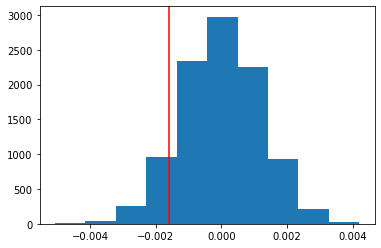

In [56]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = df2[df2['group'] == 'treatment'].converted.mean() - df2[df2['group'] == 'control'].converted.mean()
obs_diff
#plotting the histogram
plt.hist(p_diffs)
plt.axvline(obs_diff, c = 'r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [57]:
#calculating P value 
(p_diffs > obs_diff).mean()

0.9081

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

    The probability of observing statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
    it called P-Value
       - if the value is smaller than .05 then we reject the null hypothesis and say that the conversion rate is diffrent between the new page and old one
       - if the value is larger than .05 then we fail to reject the null hypothesis and say that the conversion rate is the same in the two pages
       - As we see, P- value is mych larger than .05 so we can't reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [52]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2['group'] == 'control'].converted.sum() 

# number of conversions with the new_page
convert_new = df2[df2['group'] == 'treatment'].converted.sum() 

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page'] == 'old_page'].converted.shape[0] 

# number of individuals who received new_page
n_new = df2[df2['landing_page'] == 'new_page'].shape[0] 
convert_old, convert_new, n_old ,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [61]:
# Completing the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest((convert_old, convert_new), (n_old, n_new), 0, 'smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

    - they mean that the conversion rates are equal and we can't reject the null hypothesis
    - the new page is not better than the old page
    - yes they agree as the P-value is almost the same

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    Since each row is either converted on non-converted we use logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# creating intercept column
df2['intercept'] = 1 
# creating dummy variables
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.drop(columns='control', inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
# fitting the data
model = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-19 23:03 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [40]:
np.exp(-0.0150) , 1 / np.exp(-0.0150)

(0.9851119396030626, 1.015113064615719)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

- In regression, we assume that the old page conversion rate is larger than or equal to the new page conversion rate under the null
$$H_0: p_{new} - p_{old} <= 0$$

$$H_1: p_{new} - p_{old} > 0$$
   - In A/B test, We assume that the the conversion rate of the old page is the same as the new page under the null
$$H_0: p_{new} = p_{old}$$

$$H_1: p_{new} \neq p_{old}$$
   - the p_value is associated with the significance in the relation between the test group and the conversion rate
   - We can see the diffrence between the P value in the regressin and A/B test due to the diffrence in the hypotheses and the test tails side 
   

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

    We might consider adding other things that may influence whether or not an individual will convert as how much time they spent on page before converting or the time of the visite

    adding more variables to the model makes it more accurate but also gets more complex and harder to interpret those results

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns

In [43]:
# read countries csv
countries_df = pd.read_csv('countries.csv')
# joining the new data
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
# Create the necessary dummy variables
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [45]:
df_new['intercept'] = 1
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.drop(columns='CA', inplace=True)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
model_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results_2 = model_2.fit()
results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-03-20 00:01 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [70]:
np.exp(0.0507), 1 / np.exp(0.0507)

(1.052007243765014, 0.9505637969004034)

In [71]:
np.exp(0.0408),1 /  np.exp(0.0408)

(1.0416437559600236, 0.9600211149716509)

In [68]:
df_new2 = df_new.copy()
df_new2[['control', 'treatment']] = pd.get_dummies(df_new['group'])
df_new2.drop(columns='control', inplace=True)
df_new2.rename(columns={'treatment': 'ab_page'}, inplace=True)
df_new2['interaction_tr_UK'] = df_new2['ab_page'] * df_new2['UK']
df_new2['interaction_tr_Us'] = df_new2['ab_page'] * df_new2['US']
df_new2.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,interaction_tr_UK,interaction_tr_Us
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [73]:
#### Fit Your Linear Model And Obtain the Results
model3 = sm.Logit(df_new2['converted'], df_new2[['intercept', 'ab_page', 'UK', 'interaction_tr_UK', 'US', 'interaction_tr_Us']])
results3 = model3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-03-20 00:04 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -2.0040   0.0364 -55.0077 0.0000 -2.0754 -1.9326
ab_page           -0.0674   0.0520  -1.2967 0.1947 -0.1694  0.0345
UK                 0.0118   0.0398   0.2957 0.7674 -0.0663  0.0899
interaction_tr_UK  0.0783   0.0568   1.3783 0.1681 -0.0330  0.1896
US                 0.0175   0.0377   0.4652 0.6418 -0.0563  0.0914
interaction_tr_Us  0.0469   0.0538   0.8718 0.3833 -0.0585  0.1523
==================================================================

"""

######    <span style="color: green;">from the high p_values we can conclude that an interaction between page and country has no significant effects on conversion.</span>  

<a id='conclusions'></a>
## Conclusions

- We can't reject the null hypothesis hence not enough evidence that the new_page increases the conversion rate as compared to the old_page.
- US, UK and CA countries has no significant effect on the conversion rate.
- The new page isn't better than the old one so they have to keep the old one till they develpo a better page

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.